
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations and good luck! 😊 
    

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, Jasper! I am a reviewer on this project. 

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content, however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! There're just a couple of issues, but it will not take much time. If you have any questions, feel free to ask.
    
    
    

</div>

## Initialization

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, we still need such things as introduction and a title. Please, do not forget about them.
    
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Good! 
    
</div>

Introduction:
The supermarket chain Good Seed would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage.

The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol
Computer vision methods can be used to determine age of a person from a photo
We need to explore the age distribution in the dataset and print 10-15 photos for different ages on the screen to get an overall impression of the dataset.
The task then is to build and evaluate a model for verifying people's age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
df = pd.read_csv("/datasets/faces/labels.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


## EDA

In [3]:
df.duplicated().any()

False

In [4]:
df.isna().any()

file_name    False
real_age     False
dtype: bool

In [5]:
df['real_age']

0        4
1       18
2       80
3       50
4       17
        ..
7586    14
7587    37
7588    28
7589    20
7590    47
Name: real_age, Length: 7591, dtype: int64

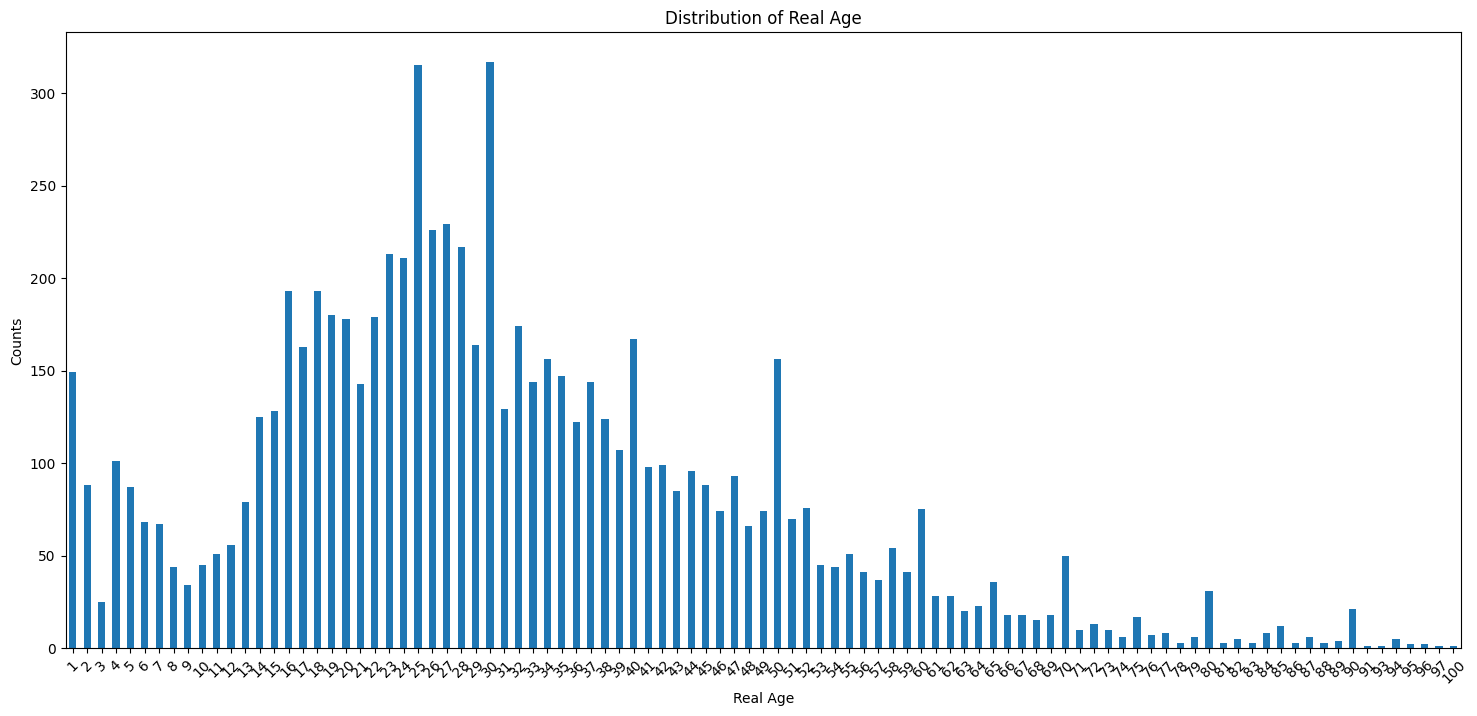

In [6]:
plt.figure(figsize=(18, 8))
df['real_age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Real Age')
plt.ylabel('Counts')
plt.title('Distribution of Real Age')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Shouldn't we sort ages instead of values? In the code above, please sort indices, not values.   
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct!     
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Student's comment </h2>
    
fixed. Distribution sorted by age. Majority of people are age between 15-50.  
    
</div>

In [7]:
df['real_age'].mean()

31.20115926755368

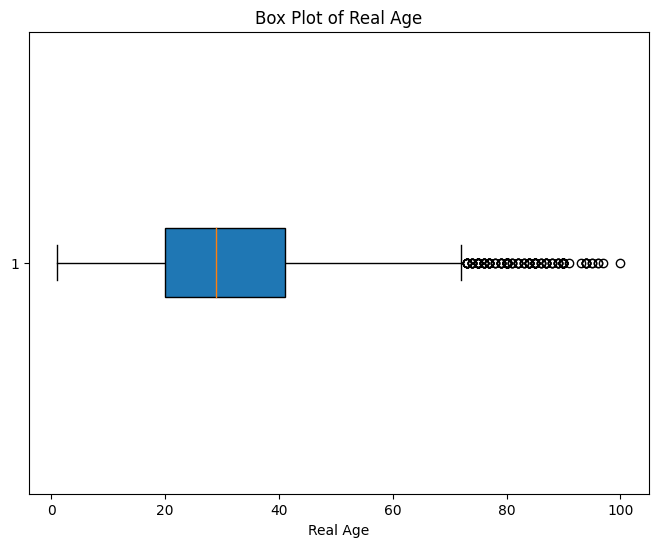

In [8]:
# Create a box plot for the 'real_age' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['real_age'], vert=False, patch_artist=True)

# Adding labels and title
plt.xlabel('Real Age')
plt.title('Box Plot of Real Age')

plt.show()

In [9]:
import os
import random
from PIL import Image

In [10]:
folder_path = '/datasets/faces/final_files'

In [11]:
all_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

In [12]:
sample_files = random.sample(all_files, min(len(all_files), 15))

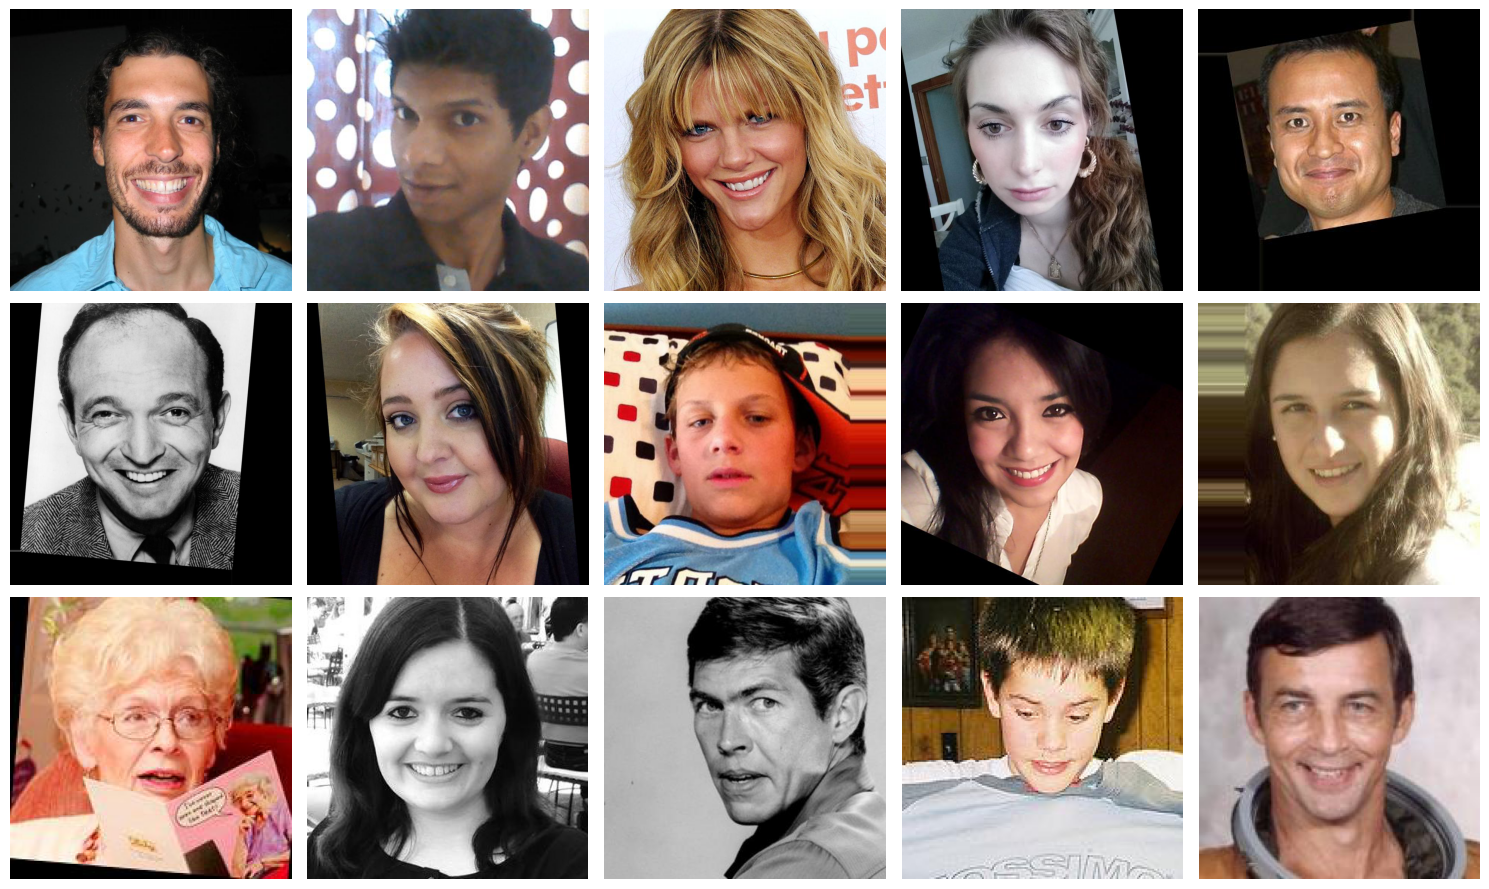

In [13]:
# Set up the plot
num_images = len(sample_files)
cols = 5
rows = (num_images // cols) + (num_images % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

for i, file in enumerate(sample_files):
    img_path = os.path.join(folder_path, file)
    img = Image.open(img_path)
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
    ax.imshow(img)
    ax.axis('off')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols] if rows > 1 else axes[j % cols])

plt.tight_layout()
plt.show()

### Findings

Observations:
- The average age of the dataset is 31.1. 
- The mode is 30. 
- Many outliers past the age of 70. 
- Right skewed.
- No duplicates or NaNs

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
    
What can we say about photos? As we can see, some of them are already rotated. Can it have any influence on our model? 
    
    

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Student's comment </h2>
    
Some photos are preprocessed to be rotated in the upright orientation. The model complexity is reduced because it does not need to be invariant to rotations. This can potentially lead to faster training times and more efficient models.
However any new rotated images that the model never seen can cause misclassification.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Good.    
    
</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [14]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [15]:
def load_train(path):
    """
    It loads the train part of dataset from path.
    """
    seed = 12345
    
    # Create an ImageDataGenerator with adjusted parameters
    train_datagen = ImageDataGenerator(
        validation_split=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,  # Reduced shift range
        height_shift_range=0.1,  # Reduced shift range
        rotation_range=10,  # Reduced rotation range
        zoom_range=0.1,  # Reduced zoom range
        rescale=1/255
    )


    # Load the data using the ImageDataGenerator
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory=path,
        x_col='file_name',
        y_col='real_age',
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=seed
    )

    return train_datagen_flow

In [16]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1/255)
    
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224,224),
        batch_size=32,  # Consistency in batch size with training data
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Yes, augmentation should help us here. 
    

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    
    
    
- Since some of the photos are already rotated and shifted, I am not sure whether we need that. 
    

- It may be reasonable to use the network's default `target_size`. Do we really need to make the photos smaller? 



- I recommend that you use some variable for `seed`. 

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Student's comment </h2>
    
Target size set to (224, 224). Seed variable created
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done!     
</div>

In [17]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    
    backbone = ResNet50(weights='imagenet',  # Kept the weights as 'imagenet' for transfer learning benefits
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [18]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2) 

    return model

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Correct.     
</div>

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [19]:
# # prepare a script to run on the GPU platform

# init_str = """
# import pandas as pd

# import tensorflow as tf

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import Adam
# """

# import inspect

# with open('run_model_on_gpu.py', 'w') as f:
    
#     f.write(init_str)
#     f.write('\n\n')
        
#     for fn_name in [load_train, load_test, create_model, train_model]:
        
#         src = inspect.getsource(fn_name)
#         f.write(src)
#         f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

```
Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921
Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035
Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454
Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481
Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192
Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332
Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359
Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239
Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529
Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629
Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866
Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591
Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467
Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401
Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841
Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304
Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419
Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226
Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908
Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512
```

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
    
You can make the output more readable. You can use Markdown cell for your code and results: 

    ```python
    
    # code
    
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


```

</div>

## Conclusions

The training loss and Mean Absolute Error (MAE) both decrease steadily over the epochs. This indicates that the model is learning and improving its performance on the training data.The training loss decreases from 95.3532 to 17.0187.
The training MAE decreases from 7.4339 to 3.1785.


The validation loss and MAE do not show a consistent downward trend. They fluctuate, suggesting potential overfitting or variability in the validation set.
The validation loss initially decreases but then increases again, ending higher than some previous epochs.
The validation MAE also fluctuates, with the lowest value being 6.6419 in epoch 17 but increasing towards the end.

The difference between training and validation performance suggests overfitting. While the training loss and MAE continue to improve, the validation metrics do not follow a similar pattern, indicating the model is fitting the training data well but not generalizing to the validation data.
Overfitting is particularly suggested by the increase in validation loss in later epochs, even as training loss continues to drop.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    

Very good! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

In your opinion, are there any other methods we can use to improve quality?
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment  </h2>
    

We can implement hyperparameter tuning, early stopping, or training with callbacks.

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
    
Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training